In [10]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [42]:
con = sqlite3.connect('stock-data.db')
cur = con.cursor()

In [74]:
XST_data = cur.execute("""SELECT * FROM stock_data WHERE ticker='SHE'""")
d = cur.fetchall()
headers, XST_data = d[0], d[1:]
data = pd.DataFrame.from_records(XST_data, columns=headers)
data.Date = pd.to_datetime(data.Date)
data.set_index(data.Date)
data.Date.dtype

dtype('<M8[ns]')

<Axes: xlabel='Date'>

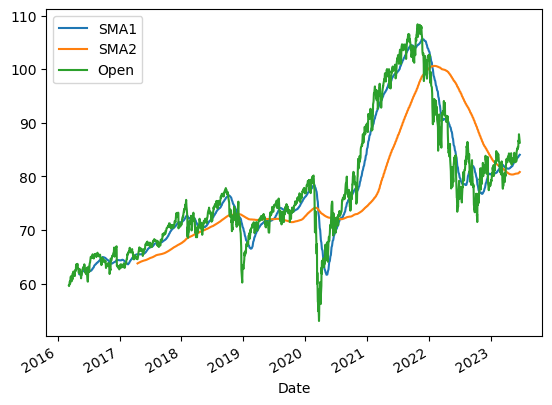

In [76]:
data['SMA1'] = data.Open.rolling(42).mean()
data['SMA2'] = data.Open.rolling(252).mean()
data.plot.line(x='Date',y=['SMA1','SMA2','Open'])